Import Library & Load Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 3 - rnn/train.csv')
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 3 - rnn/Test_Jan.csv')

Data Exploration

In [ ]:
train_info = dataset_train.info()
test_info = dataset_test.info()
print(train_info, test_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43775 entries, 0 to 43774
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    43775 non-null  datetime64[ns]
 1   nat_demand  43775 non-null  float64       
 2   T2M_toc     43775 non-null  float64       
 3   QV2M_toc    43775 non-null  float64       
 4   TQL_toc     43775 non-null  float64       
 5   W2M_toc     43775 non-null  float64       
 6   T2M_san     43775 non-null  float64       
 7   QV2M_san    43775 non-null  float64       
 8   TQL_san     43775 non-null  float64       
 9   W2M_san     43775 non-null  float64       
 10  T2M_dav     43775 non-null  float64       
 11  QV2M_dav    43775 non-null  float64       
 12  TQL_dav     43775 non-null  float64       
 13  W2M_dav     43775 non-null  float64       
 14  Holiday_ID  43775 non-null  int64         
 15  holiday     43775 non-null  int64         
 16  school      43775 non-

Visualize Data

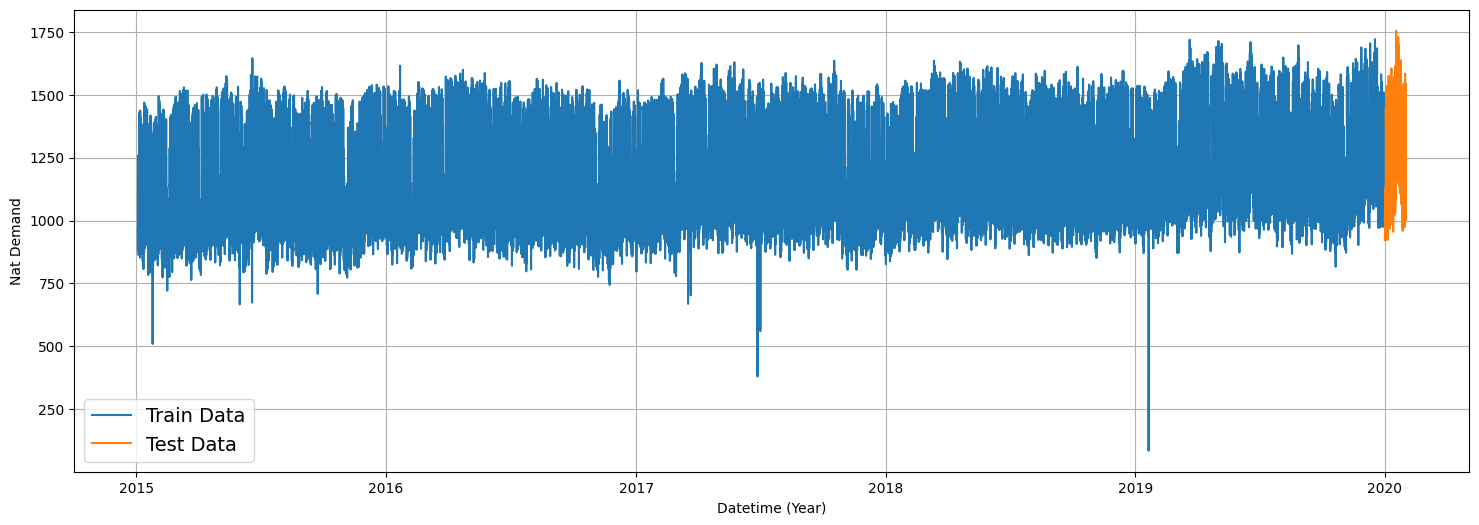

In [ ]:
import csv
from datetime import datetime

def read_data(file_path):
    timesteps = []
    values = []
    with open(file_path, "r") as f:
        csv_reader = csv.reader(f, delimiter=",")
        next(csv_reader)
        for line in csv_reader:
            timesteps.append(datetime.strptime(line[0], "%d-%m-%Y %H:%M"))
            values.append(float(line[1]))
    return timesteps, values

def plot(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)

def main():
    path1 = "/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 3 - rnn/train.csv"
    path2 = "/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 3 - rnn/Predict_Jan.csv"

    timesteps_train, nat_demand_train = read_data(path1)
    timesteps_test, nat_demand_test = read_data(path2)

    plt.figure(figsize=(18, 6))
    plot(timesteps=timesteps_train, values=nat_demand_train, format='-', label="Train Data")
    plot(timesteps=timesteps_test, values=nat_demand_test, format='-', label="Test Data")

    plt.xlabel("Datetime (Year)")
    plt.ylabel("Nat Demand")
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

Feature Extraction

In [ ]:
dataset_train['date'] = dataset_train['datetime'].dt.day
dataset_train['month'] = dataset_train['datetime'].dt.month
dataset_train['year'] = dataset_train['datetime'].dt.year
dataset_train['hour'] = dataset_train['datetime'].dt.hour

dataset_test['date'] = dataset_test['datetime'].dt.day
dataset_test['month'] = dataset_test['datetime'].dt.month
dataset_test['year'] = dataset_test['datetime'].dt.year
dataset_test['hour'] = dataset_test['datetime'].dt.hour

Model Training

In [ ]:
y_train = dataset_train['nat_demand'].values
X_train = dataset_train.drop(columns=['nat_demand', 'datetime']).values

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(512, activation='tanh', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))

optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, verbose=2)
model.summary()

print('\n')

loss = model.evaluate(X_train_reshaped, y_train)
print(f'Train Loss: {loss}')

Epoch 1/500
1368/1368 - 37s - loss: 18733.4785 - 37s/epoch - 27ms/step
Epoch 2/500
1368/1368 - 24s - loss: 10206.1738 - 24s/epoch - 18ms/step
Epoch 3/500
1368/1368 - 25s - loss: 9749.7471 - 25s/epoch - 18ms/step
Epoch 4/500
1368/1368 - 23s - loss: 9561.4053 - 23s/epoch - 17ms/step
Epoch 5/500
1368/1368 - 25s - loss: 9390.2178 - 25s/epoch - 18ms/step
Epoch 6/500
1368/1368 - 25s - loss: 9238.6191 - 25s/epoch - 18ms/step
Epoch 7/500
1368/1368 - 24s - loss: 9174.6572 - 24s/epoch - 17ms/step
Epoch 8/500
1368/1368 - 25s - loss: 9115.8281 - 25s/epoch - 18ms/step
Epoch 9/500
1368/1368 - 23s - loss: 9047.3301 - 23s/epoch - 17ms/step
Epoch 10/500
1368/1368 - 25s - loss: 8995.0254 - 25s/epoch - 18ms/step
Epoch 11/500
1368/1368 - 23s - loss: 8951.5527 - 23s/epoch - 17ms/step
Epoch 12/500
1368/1368 - 24s - loss: 8917.3730 - 24s/epoch - 17ms/step
Epoch 13/500
1368/1368 - 23s - loss: 8903.1270 - 23s/epoch - 17ms/step
Epoch 14/500
1368/1368 - 24s - loss: 8840.6299 - 24s/epoch - 18ms/step
Epoch 15/500


Model Testing

In [ ]:
y_test = dataset_test['nat_demand'].values
X_test = dataset_test.drop(columns=['nat_demand', 'datetime']).values

X_test_scaled = scaler.transform(X_test)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

predictions = model.predict(X_test_reshaped)

test_loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {test_loss}')

24/24 [==============================] - 1s 4ms/step - loss: 1444009.5000
Test Loss: 1444009.5


Comparing Test Result with Actual

24/24 [==============================] - 0s 4ms/step


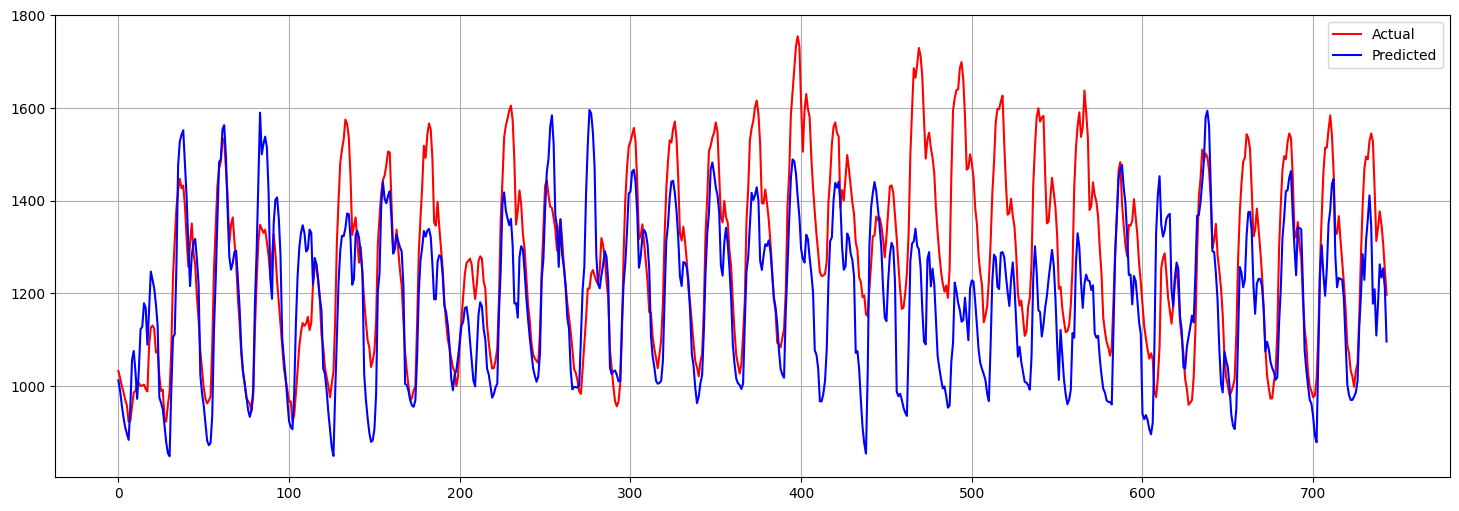

In [ ]:
dataset_predictjan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/semester 5 - dnn/pbl 3 - rnn/Predict_Jan.csv')

y_predictjan = dataset_predictjan['nat_demand'].values
X_predictjan = dataset_test.drop(columns=['nat_demand', 'datetime']).values

predictions_predictjan = model.predict(X_predictjan.reshape((X_predictjan.shape[0], 1, X_predictjan.shape[1])))

plt.figure(figsize=(18, 6))
plt.plot(y_predictjan, color='red', label='Actual')
plt.plot(predictions, color='blue', label='Predicted')
plt.legend()
plt.grid(True)
plt.show()